In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import json
DIRS = ['../KMEANS']

In [2]:
# KMEANS
directory = DIRS[0]
files = os.listdir(directory)
results = {}
n_clust= 100
for f_name in files:
    with open(os.path.join(directory, f_name)) as f:
        js_f = json.load(f)
    n_clusters = js_f['meta']['args']['n_clusters']
    init = js_f['meta']['args']['init']
    alg = js_f['meta']['args']['algorithm']
    scores = js_f['result']['result']
    key = init + ' ' + alg
    if key not in results:
        results[key] = [0]*(n_clust+1)
    results[key][n_clusters] = np.mean(scores)

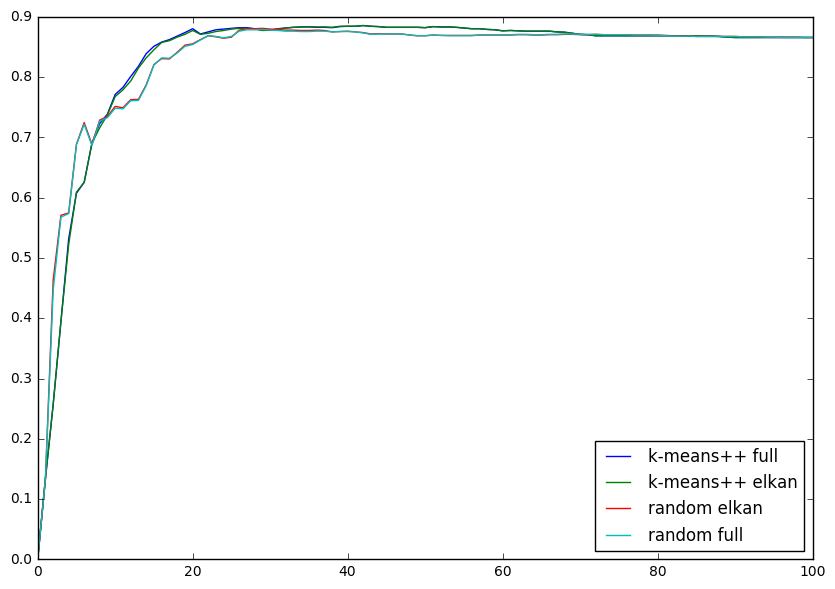

In [3]:
plt.figure(figsize=(10, 7))
for key in results.keys():
    plt.plot(results[key], label=key)
plt.legend(loc=4)
plt.show()